## 2 1911 Solar Eclipse ##

    (a)
    r = (x^2 + b^2)^(1/2)
    sin(theta) = b/r
    dv_y/dt = GMsin(theta)/(r^2) = GMsin(theta)/(x^2 + b^2) = GMb/(x^2 + b^2)^(3/2) 
    v_x=c
    t = x/v_x = x/c --> x = ct 
    dv_y = GMb/(c^2*t^2+b^2)^(3/2)dt
    v_y = 2GM/bc
    tan(alpha) = alpha = v_y/v_x = 2GM/(b*c^2) 

    (b)
    Newton: alpha = 2GM/(b*c^2) = 4.257*10^-6 radians = .878 arcsec 
    Einstein: alpha  = 8.515*10^-6 radians = 1.756 arcsec

## 3 Masses of Galaxies

    Ds*theta - Ds*beta = Dds*alpha(hat) 
    theta - beta = (Dds/Ds)*alpha(hat) 
    beta = theta - (Dds/Ds)(4GM)/(Dd*theta*c^2)
    Assuming Einstein ring, beta = 0
    theta_E = (theta_1 + theta_2)/2
    M = (Ds/Dds)*theta_E*(Dd*theta_E*c^2)/4G
    M = 5.91*10^42 kg

## 4 Solving the Lens Equation

    (a) If the source is right behind the lensing mass, there are an infinite number of rays. They originate from the source and form an Einstein ring on the lens.

In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

Mpc2m = 3.08*10**22
arcs2rad = 4.848*10**(-6)
Ds = 1768.2*Mpc2m
Dds = 720.9*Mpc2m
Dd = 1047.3*Mpc2m
M = 5.91*10**42
c = 3*10**8
G = 6.67408*10**(-11)


def betax(x,y):
    theta = x - 400
    thetb = y - 400
    if theta > 0:
        beta = (theta)*(0.05*arcs2rad) - (Dds/Ds)*(4*G*M)/((c**2)*np.sqrt(theta**2 + thetb**2)*(0.05*arcs2rad)*Dd)
        return beta
    else:
        beta = (theta)*(0.05*arcs2rad) + (Dds/Ds)*(4*G*M)/((c**2)*np.sqrt(theta**2 + thetb**2)*(0.05*arcs2rad)*Dd)
        return beta

def betay(x,y):
    theta = x - 400
    thetb = y - 400
    if thetb > 0:
        beta = (thetb)*(0.05*arcs2rad) - (Dds/Ds)*(4*G*M)/((c**2)*np.sqrt(theta**2 + thetb**2)*(0.05*arcs2rad)*Dd)
        return beta
    else:
        beta = (thetb)*(0.05*arcs2rad) + (Dds/Ds)*(4*G*M)/((c**2)*np.sqrt(theta**2 + thetb**2)*(0.05*arcs2rad)*Dd)
        return beta


def xbeta(x,y):
    if x == 400:# or y == 400:
        return 0
    else:
        xbeta = betax(x,y)
        xbeta = int(round(206271 * xbeta / 0.05))
        return xbeta

def ybeta(x,y):
    if y == 400:# or x == 400:
        return 0
    else:
        ybeta = betay(x,y)
        ybeta = int(round(206271 * ybeta / 0.05))
        return ybeta

lscreen = np.zeros((800,800,2))
rscreen = np.zeros((800,800,2))

x = 1
y = 1

for x in range(1,801):
    #lscreen[x-1, y-1, 0] = xbeta(x,y)
    #lscreen[x-1, y-1, 1] = ybeta(x,y)
    for y in range(1,801):
        lscreen[799-x, 799-y, 0] = -xbeta(x,y)/10
        lscreen[799-x, 799-y, 1] = -ybeta(x,y)/10

(c)


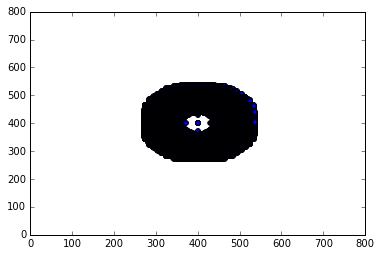

In [3]:
source = np.zeros((400,2))

i = 0
xoff = 0
yoff = 0
    
for a in range(-10,11):
    for b in range(-10,11):
        vala = a**2
        valb = b**2
        val = vala + valb
        value = int(round(np.sqrt(val)))
        if a == 0 and b == 0:
            i = i
        elif  value < 11:
            source[i,0] = a + xoff
            source[i,1] = b + yoff
            i += 1
            
ahit = []
bhit = []

xoff = 0
yoff = 0

for x in range(0, 800):
    for y in range(0, 800):
        for i in range(0,400): 
            if source[i,0] == lscreen[x,y,0] and source[i,1] == lscreen[x,y,1]:
                if a != 0 and b !=0:
                    ahit.append(x+1)
                    bhit.append(y+1)
                    
print "(c)"
                    
plt.scatter(ahit,bhit)
plt.ylim(0,800)
plt.xlim(0,800)
plt.show()

(d)


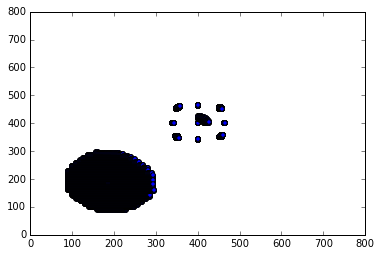

In [4]:
source = np.zeros((400,2))

i = 0
xoff = -20
yoff = -20
    
for a in range(-10,11):
    for b in range(-10,11):
        vala = a**2
        valb = b**2
        val = vala + valb
        value = int(round(np.sqrt(val)))
        if a == 0 and b == 0:
            i = i
        elif  value < 11:
            source[i,0] = a + xoff
            source[i,1] = b + yoff
            i += 1
            
ahit = []
bhit = []

for x in range(0, 800):
    for y in range(0, 800):
        for i in range(0,400):
            if source[i,0] == lscreen[x,y,0] and source[i,1] == lscreen[x,y,1]:
                if a != 0 and b !=0:
                    ahit.append(x+1)
                    bhit.append(y+1)

print "(d)"
                    
plt.scatter(ahit,bhit)
plt.ylim(0,800)
plt.xlim(0,800)
plt.show()

## 5 Gravitational lensing and the Bullet Cluster

    (a)
    tau = (sigma/m)*Sigma
    
    (b)
    Sigma = 0.02 m^2/kg
    We can say that sigma/m must be very small or almost infinitesimal because if the particles do not scatter at a detectable level then tau must be close to zero. 